# **COVID 19 Lung Damage Detection using Convolutional Neural Networks  and Data Augmentation**

- Below 5 cells of codes is to fetch Kaggle Datasets into Google Colab directly

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
#%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

In [ ]:
#!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

# **Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import cv2
import os

# **Normalization**

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

# **Train,validation,Test Split**

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary') # We are having only 2 output classes in dataset so we are using 'Binary' class mode
val_dataset = val.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
test_dataset = test.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 624 images belonging to 2 classes.


- **Changed Categotical classes to numerical**

In [ ]:
train_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
train_dataset.class_mode

'binary'

In [ ]:
train_dataset.color_mode

'rgb'

In [ ]:
val_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
(train_dataset.classes)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
len(train_dataset.classes)

5216

In [ ]:
img = image.load_img('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')

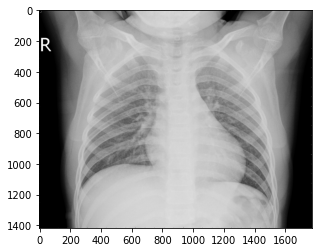

In [ ]:
plt.imshow(img)

In [ ]:
os.listdir('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL')

['NORMAL2-IM-1431-0001.jpeg',
 'NORMAL2-IM-1440-0001.jpeg',
 'NORMAL2-IM-1436-0001.jpeg',
 'NORMAL2-IM-1438-0001.jpeg',
 'NORMAL2-IM-1427-0001.jpeg',
 '.DS_Store',
 'NORMAL2-IM-1430-0001.jpeg',
 'NORMAL2-IM-1442-0001.jpeg',
 'NORMAL2-IM-1437-0001.jpeg']

X-rays of Normal Person


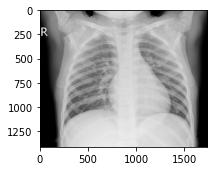

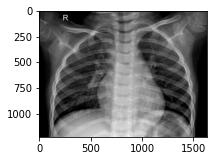

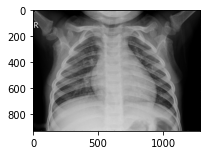

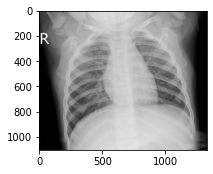

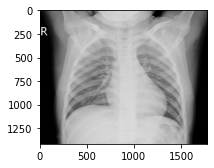

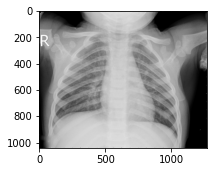

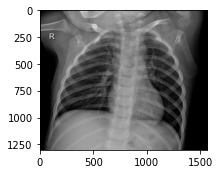

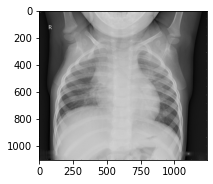

In [ ]:
dir_path_normal = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/NORMAL'
print("X-rays of Normal Person")
for i in os.listdir(dir_path_normal):
  if i != '.DS_Store':
    img=image.load_img(dir_path_normal+'//'+i)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()
    #count +=1

In [ ]:
dir_path_pneumonia = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/PNEUMONIA'
os.listdir(dir_path_pneumonia)

['person1954_bacteria_4886.jpeg',
 'person1951_bacteria_4882.jpeg',
 'person1946_bacteria_4874.jpeg',
 'person1947_bacteria_4876.jpeg',
 '.DS_Store',
 'person1946_bacteria_4875.jpeg',
 'person1949_bacteria_4880.jpeg',
 'person1952_bacteria_4883.jpeg',
 'person1950_bacteria_4881.jpeg']

X-rays of Pneumonia Person


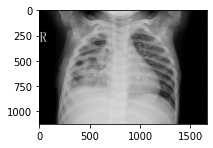

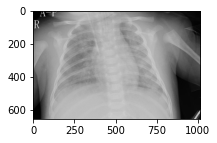

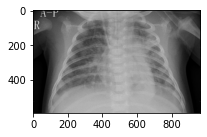

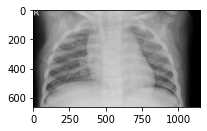

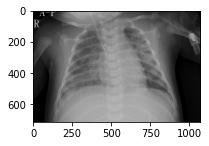

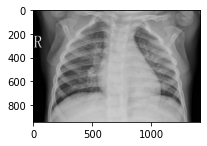

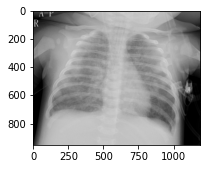

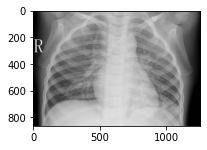

In [ ]:
dir_path_pneumonia = '/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val/PNEUMONIA'
print("X-rays of Pneumonia Person")

for i in os.listdir(dir_path_pneumonia):
  if i != '.DS_Store':
    img=image.load_img(dir_path_pneumonia+'//'+i)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()
    #count +=1

# **5. Model Building**
o CNN Model  
o Use Callbacks(ReduceLROnPlateau)  
o Model Fitting


# **CNN Model**

In [ ]:
model = tf.keras.models.Sequential([ 
                                    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'] )

In [ ]:
plot=modet_fit=model.fit(train_dataset,validation_data= val_dataset)

1739/1739 [==============================] - 1723s 972ms/step - loss: 0.4828 - accuracy: 0.8731 - val_loss: 1.2912 - val_accuracy: 0.6875


In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(test_dataset)

208/208 [==============================] - 227s 1s/step - loss: 1.1461 - accuracy: 0.7596


In [ ]:
print("Accuracy of the model is - " , test_acc*100 , "%")

Accuracy of the model is -  75.96153616905212 %


- **Predicting Validation set**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

val_pred=model.predict(val_dataset)
print(val_pred)

[[0.27857935]
 [0.15080792]
 [0.813719  ]
 [0.49991062]
 [0.11625698]
 [0.1255088 ]
 [0.85398793]
 [0.25303146]
 [0.01902763]
 [0.95835435]
 [0.97433996]
 [0.785172  ]
 [0.03815746]
 [0.49392205]
 [0.07675053]
 [0.88549244]]


In [ ]:
val_pred = np.argmax(val_pred, axis=1)
print(val_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
val_pred= model.predict_classes(val_dataset)
val_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

- **Defing a function for visualization**

In [ ]:
def graph(plot):
  acc = plot.history['accuracy']
  val_acc = plot.history['val_accuracy']
  loss = plot.history['loss']
  val_loss = plot.history['val_loss']

  plt.figure(figsize=(10,5))
  plt.plot(acc, label='Training accuracy')
  plt.plot(val_acc, label='Validation accuracy')
  plt.plot(loss, label='Training loss')
  plt.plot(val_loss,  label='Validation loss')
  plt.ylabel('accuracy and loss')
  plt.xlabel('epoch')
  plt.title('Training loss & accuracy and validation loss & accuracy')
  plt.legend(loc='best')
  plt.show()

In [ ]:
def graphacc(plot):
  acc = plot.history['accuracy']
  val_acc = plot.history['val_accuracy']

  plt.figure(figsize=(10,5))
  plt.plot(acc, label='Training accuracy')
  plt.plot(val_acc, label='Validation accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.title('Training & validation : accuracy')
  plt.legend(loc='best')
  plt.show()

In [ ]:
def graphloss(plot):
  loss = plot.history['loss']
  val_loss = plot.history['val_loss']

  plt.figure(figsize=(10,5))
  plt.plot(loss, label='Training loss')
  plt.plot(val_loss,  label='Validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.title('Training & validation : loss')
  plt.legend(loc='best')
  plt.show()

# **Use Callbacks(ReduceLROnPlateau)**

In [ ]:
model = tf.keras.models.Sequential([ 
                                    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
from keras.callbacks import ReduceLROnPlateau

rlrop = ReduceLROnPlateau()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'] )

In [ ]:
callbacksplot=model.fit(train_dataset,validation_data= val_dataset,epochs=10,callbacks=[rlrop])

Epoch 1/10
1739/1739 [==============================] - 107s 42ms/step - loss: 0.4525 - accuracy: 0.8652 - val_loss: 0.2045 - val_accuracy: 0.8750
Epoch 2/10
1739/1739 [==============================] - 68s 39ms/step - loss: 0.1691 - accuracy: 0.9483 - val_loss: 0.6183 - val_accuracy: 0.6875
Epoch 3/10
1739/1739 [==============================] - 70s 40ms/step - loss: 0.1262 - accuracy: 0.9685 - val_loss: 0.1099 - val_accuracy: 1.0000
Epoch 4/10
1739/1739 [==============================] - 68s 39ms/step - loss: 0.1201 - accuracy: 0.9666 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 5/10
1739/1739 [==============================] - 68s 39ms/step - loss: 0.1129 - accuracy: 0.9686 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 6/10
1739/1739 [==============================] - 70s 40ms/step - loss: 0.0965 - accuracy: 0.9784 - val_loss: 2.0694 - val_accuracy: 0.6250
Epoch 7/10
1739/1739 [==============================] - 69s 39ms/step - loss: 0.1546 - accuracy: 0.9766 - val_loss: 0.0596 

# **Accuarcy and Loss Visualization**

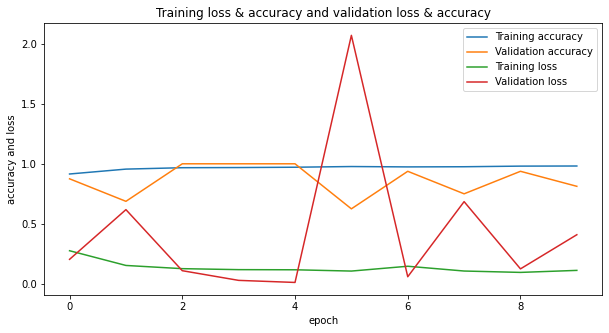

In [ ]:
graph(callbacksplot) # calling user defined function for visualization

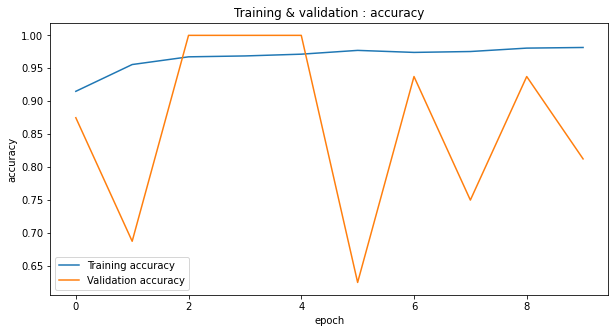

In [ ]:
graphacc(callbacksplot) # calling user defined function for visualization

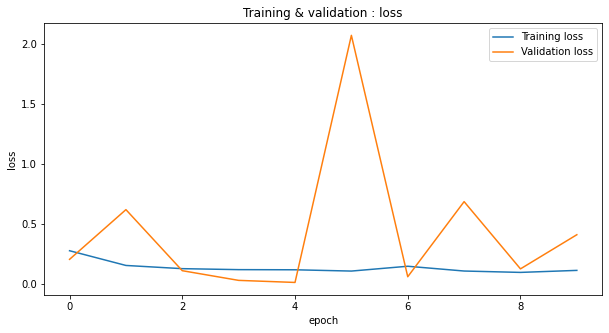

In [ ]:
graphloss(callbacksplot) # calling user defined function for visualization

- **After Using Early Stops**

In [ ]:
model = tf.keras.models.Sequential([ 
                                    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'] )

In [ ]:
my_callbacks=[
              tf.keras.callbacks.ReduceLROnPlateau(),
              tf.keras.callbacks.EarlyStopping()]

In [ ]:
plotcallback=model.fit(train_dataset,validation_data= val_dataset,epochs=10,callbacks=my_callbacks)

Epoch 1/10
1739/1739 [==============================] - 68s 39ms/step - loss: 0.1384 - accuracy: 0.9657 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 2/10
1739/1739 [==============================] - 67s 39ms/step - loss: 0.1459 - accuracy: 0.9693 - val_loss: 0.0933 - val_accuracy: 0.9375


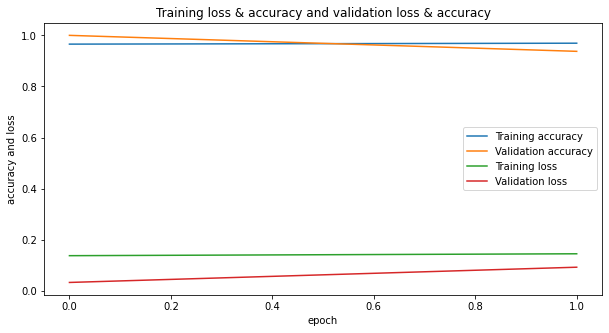

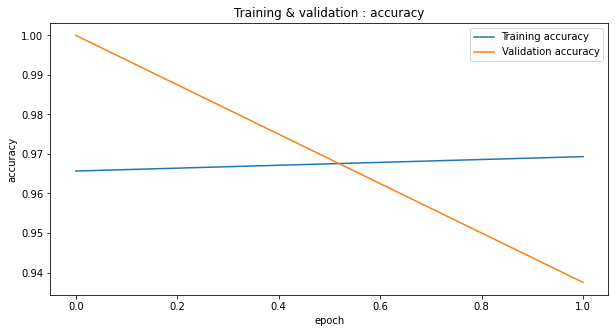

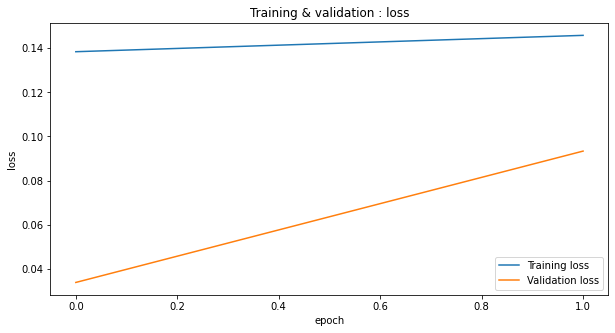

In [ ]:
# calling user defined function for visualization
graph(plotcallback)
graphacc(plotcallback)
graphloss(plotcallback)

In [ ]:
plotcallback1=model.fit(train_dataset,validation_data= val_dataset,epochs=10,callbacks=[tf.keras.callbacks.ReduceLROnPlateau(),
              tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
1739/1739 [==============================] - 68s 39ms/step - loss: 0.1365 - accuracy: 0.9722 - val_loss: 0.5607 - val_accuracy: 0.8125
Epoch 2/10
1739/1739 [==============================] - 68s 39ms/step - loss: 0.1456 - accuracy: 0.9726 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 3/10
1739/1739 [==============================] - 67s 39ms/step - loss: 0.1396 - accuracy: 0.9741 - val_loss: 0.5123 - val_accuracy: 0.8125
Epoch 4/10
1739/1739 [==============================] - 67s 39ms/step - loss: 0.1129 - accuracy: 0.9766 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 5/10
1739/1739 [==============================] - 67s 38ms/step - loss: 0.1241 - accuracy: 0.9774 - val_loss: 0.0934 - val_accuracy: 0.9375
Epoch 6/10
1739/1739 [==============================] - 67s 39ms/step - loss: 0.1126 - accuracy: 0.9803 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 7/10
1739/1739 [==============================] - 67s 38ms/step - loss: 0.1264 - accuracy: 0.9837 - val_loss: 0.5159 -

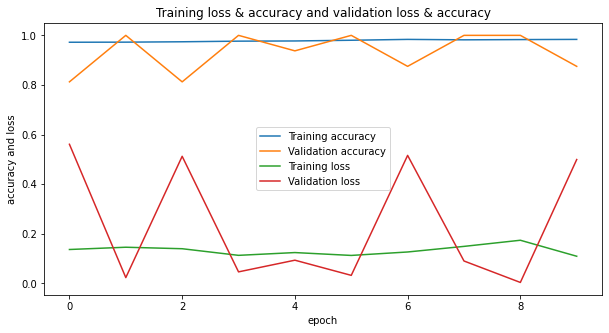

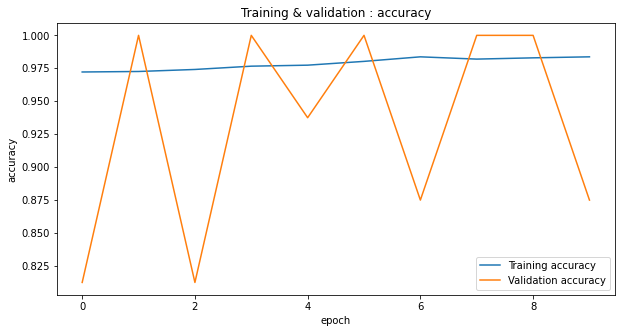

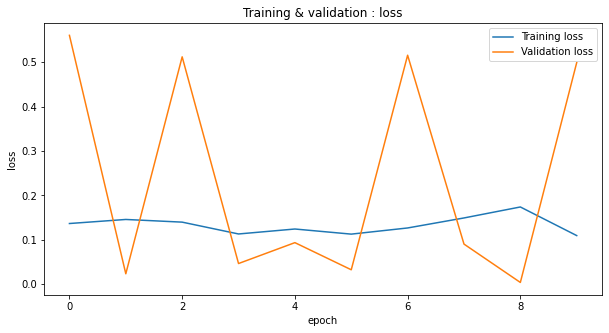

In [ ]:
# calling user defined function for visualization
graph(plotcallback1)
graphacc(plotcallback1)
graphloss(plotcallback1)

In [ ]:
test_loss,test_acc=model.evaluate(test_dataset)
print("Test accuracy:",test_acc)
print("Accuracy of the model on Test Data Set - " , test_acc*100 , "%")

208/208 [==============================] - 6s 31ms/step - loss: 3.0344 - accuracy: 0.7708
Test accuracy: 0.7708333134651184
Accuracy of the model on Test Data Set -  77.08333134651184 %




---


1. CNN model (Raw model Building)
- Train Accuracy        : 87%
- Validation Accuracy   : 68%
- Test Accuracy         : 75%

---
2. Callbacks ReduceLROnPlateau 
- Train Accuracy        : 98%
- Validation Accuracy   : 87%
- Test Accuracy         : 77%

---

From the above experiment I've observed that CNN Model with **RMSprop optimizer, 0.001 learning rate** and **Callbacks with ReduceLROnPlateau** giving Good Accuracy result


---

# **6. Model Evaluation** 
o Confusion Matrix  
o Accuarcy and Loss Visualization  

- **Confusion Matrix**

In [ ]:
print(confusion_matrix(val_dataset.classes,val_pred))

[[8 0]
 [8 0]]


- **Confusion Matrix Heatmap**

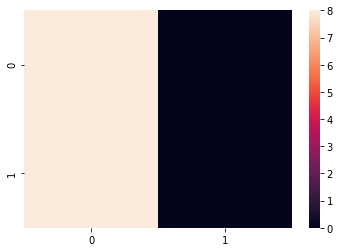

In [ ]:
sns.heatmap(confusion_matrix(val_dataset.classes,val_pred))

- **Classification Report for Validation Data set**

In [ ]:
#target_names =[0,1]
print(classification_report(val_dataset.classes,val_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- **Matrix for Test Data set**

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix

test_pred=model.predict(test_dataset)
print(test_pred)

[[9.9999046e-01]
 [1.6505163e-13]
 [8.1447121e-10]
 ...
 [5.1504292e-15]
 [6.5364592e-15]
 [1.0000000e+00]]


In [ ]:
test_pred = np.argmax(test_pred, axis=1)
print(test_pred)

[0 0 0 ... 0 0 0]


In [ ]:
test_pred= model.predict_classes(test_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


- **Classification Report for Test DataSet**

In [ ]:
print(classification_report(test_dataset.classes,test_pred))

              precision    recall  f1-score   support

           0       0.45      0.18      0.26       234
           1       0.64      0.87      0.74       390

    accuracy                           0.61       624
   macro avg       0.55      0.53      0.50       624
weighted avg       0.57      0.61      0.56       624



- **Confusion Matrix for Test DataSet**

In [ ]:
print(confusion_matrix(test_dataset.classes,test_pred))

[[ 43 191]
 [ 52 338]]


- **Confusion Matrix Heatmap for Test DataSet**

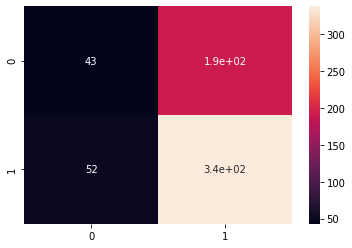

In [ ]:
sns.heatmap(confusion_matrix(test_dataset.classes,test_pred),annot=True)

# **Challenges to be done:**  
1.Apply transfer learning models   
a) VGG16   
B) VGG19   
C) Resnet 50   
D)Resnet 101   
e)Resnet 152

![image.png](https://www.topbots.com/wp-content/uploads/2017/06/neural_network_architectures_800x350px_web-1.png)

# **VGG16** 
- Method 1

![image.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/VGG-2.png)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
vgg = VGG16(input_shape=[200,200] + [3] , include_top=False, weights='imagenet')
#vgg.output

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
val_dataset = val.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')
test_dataset = test.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
IMAGE_SIZE = [200,200]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False
 
x = Flatten()(vgg.output)
prediction = Dense(1, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer]
start = datetime.now()
history = model.fit_generator(train_dataset,   
                    validation_data = val_dataset)
duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1739/1739 [==============================] - 2582s 1s/step - loss: 0.0000e+00 - accuracy: 0.7388 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Training completed in time:  0:43:01.945325


In [ ]:
test_loss,test_acc=model.evaluate(test_dataset)

print("Accuracy of the model is - " , test_acc*100 , "%")

208/208 [==============================] - 288s 1s/step - loss: 0.0000e+00 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


In [ ]:
test_loss,test_acc=model.evaluate(test_dataset)

print("Accuracy of the model is - " , test_acc*100 , "%")

208/208 [==============================] - 7s 32ms/step - loss: 0.0000e+00 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


# **VGG16**
- Method 2

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

#TLM: Transfer learning Models
train_dataset_TLM = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(224,224),
                                          #batch_size=3,
                                          class_mode='binary')
val_dataset_TLM = val.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(224,224),
                                          #batch_size=3,
                                          class_mode='binary')
test_dataset_TLM = test.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(224,224),
                                          #batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
VGG = keras.applications.vgg16.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
VGG.trainable=False

In [ ]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model= keras.Sequential([
                         VGG,
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dense(units=256,activation="relu"),
                         keras.layers.Dense(units=1,activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 257       
Total params: 21,203,521
Trainable params: 6,488,833
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 257       
Total params: 21,203,521
Trainable params: 6,488,833
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#epoch 10
hist=model.fit_generator(generator=train_dataset_TLM,validation_data= val_dataset_TLM,epochs=10)
model.save('vggclf.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
163/163 [==============================] - 58s 356ms/step - loss: 0.1246 - accuracy: 0.9576 - val_loss: 0.6442 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 58s 353ms/step - loss: 0.0744 - accuracy: 0.9751 - val_loss: 0.2035 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 58s 355ms/step - loss: 0.0652 - accuracy: 0.9770 - val_loss: 0.1160 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 58s 356ms/step - loss: 0.0559 - accuracy: 0.9839 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 58s 354ms/step - loss: 0.0480 - accuracy: 0.9820 - val_loss: 0.4802 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 58s 354ms/step - loss: 0.0440 - accuracy: 0.9854 - val_loss: 0.7459 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 58s 355ms/step - loss: 0.0395 - accuracy: 0.9895 - val_loss: 0.7906 - val_ac

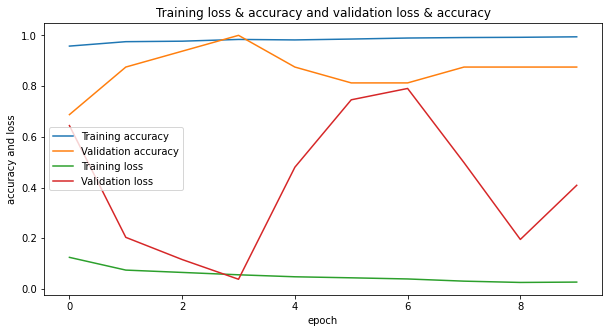

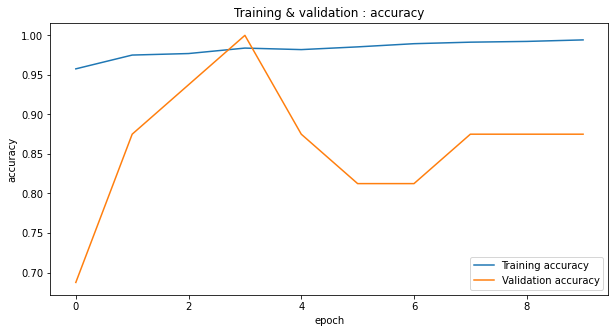

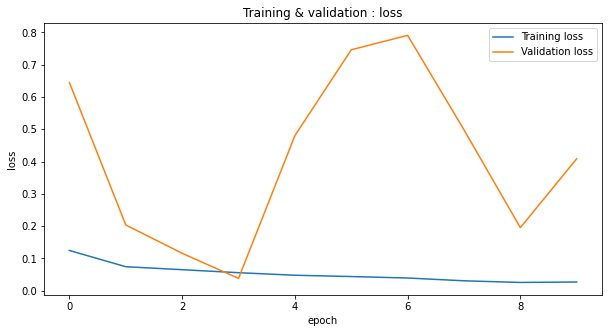

In [ ]:
# calling user defined function for visualization
graph(hist)
graphacc(hist)
graphloss(hist)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18
163/163 [==============================] - 59s 360ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.2503 - val_accuracy: 0.8750
Epoch 2/18
163/163 [==============================] - 59s 359ms/step - loss: 0.0236 - accuracy: 0.9987 - val_loss: 0.6884 - val_accuracy: 0.8750
Epoch 3/18
163/163 [==============================] - 58s 354ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.3100 - val_accuracy: 0.9375
Epoch 4/18
163/163 [==============================] - 58s 356ms/step - loss: 0.0099 - accuracy: 0.9992 - val_loss: 0.4602 - val_accuracy: 0.8750
Epoch 5/18
163/163 [==============================] - 58s 354ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.1396 - val_accuracy: 0.9375
Epoch 6/18
163/163 [==============================] - 58s 355ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.3365 - val_accuracy: 0.8750
Epoch 7/18
163/163 [==============================] - 58s 353ms/step - loss: 7.0921e-08 - accuracy: 1.0000 - val_loss: 0.1133 - va

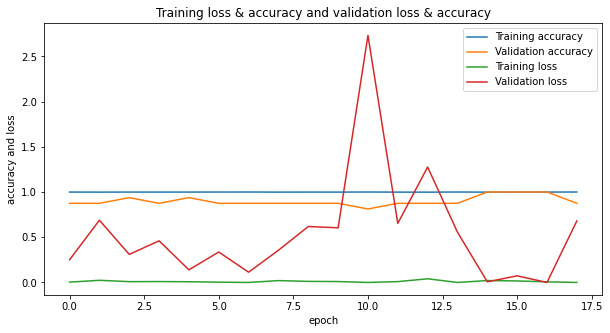

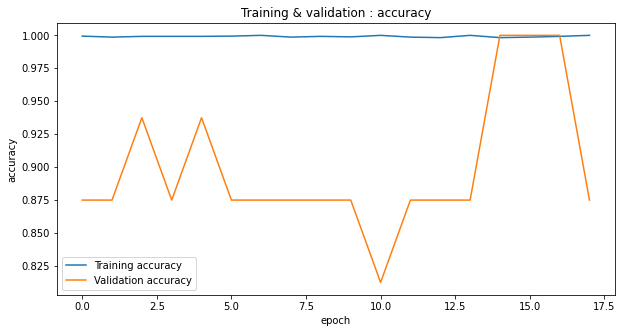

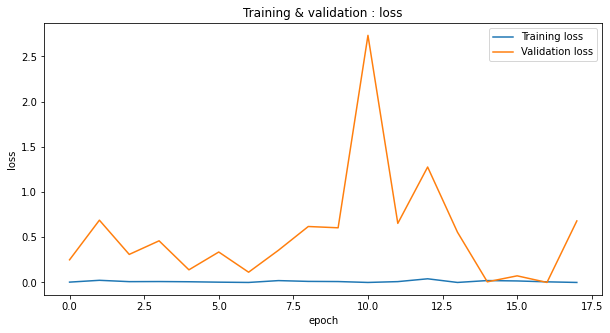

In [ ]:
#epoch 18
hist=model.fit_generator(generator=train_dataset_TLM,validation_data= val_dataset_TLM,epochs=18)
model.save('vggclf.h5')
graph(hist)
graphacc(hist)
graphloss(hist)

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(test_dataset_TLM)
print("Accuracy of the model is - " , test_acc*100 , "%")

20/20 [==============================] - 6s 303ms/step - loss: 8.4487 - accuracy: 0.7388
Accuracy of the model is -  73.87820482254028 %


- **Changing Optimizer and increasing epochs**

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'] )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18
163/163 [==============================] - 58s 350ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 6.9695e-07 - val_accuracy: 1.0000
Epoch 2/18
163/163 [==============================] - 57s 350ms/step - loss: 0.0113 - accuracy: 0.9973 - val_loss: 0.3431 - val_accuracy: 0.9375
Epoch 3/18
163/163 [==============================] - 57s 352ms/step - loss: 9.7249e-06 - accuracy: 1.0000 - val_loss: 0.4352 - val_accuracy: 0.8750
Epoch 4/18
163/163 [==============================] - 58s 353ms/step - loss: 7.3128e-06 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.8750
Epoch 5/18
163/163 [==============================] - 57s 351ms/step - loss: 3.3594e-06 - accuracy: 1.0000 - val_loss: 0.4235 - val_accuracy: 0.8750
Epoch 6/18
163/163 [==============================] - 57s 349ms/step - loss: 2.7109e-06 - accuracy: 1.0000 - val_loss: 0.4197 - val_accuracy: 0.8750
Epoch 7/18
163/163 [==============================] - 57s 349ms/step - loss: 1.4320e-06 - accuracy: 1.0000 - v

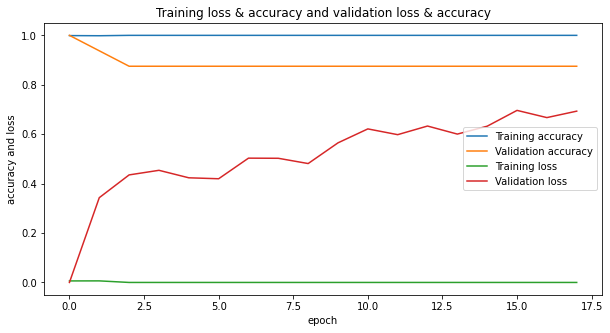

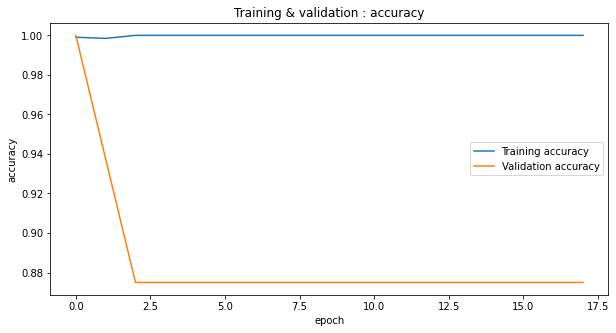

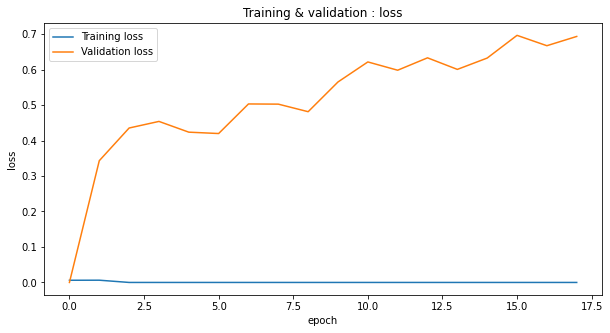

In [ ]:
#epoch 18
hist=model.fit_generator(generator=train_dataset_TLM,validation_data= val_dataset_TLM,epochs=18)
model.save('vggclf.h5')

# calling user defined function for visualization
graph(hist)
graphacc(hist)
graphloss(hist)

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(test_dataset_TLM)
print("Accuracy of the model is - " , test_acc*100 , "%")

20/20 [==============================] - 6s 298ms/step - loss: 5.7043 - accuracy: 0.7500
Accuracy of the model is -  75.0 %


# **VGG19**

![image.png](https://miro.medium.com/max/2408/1*6U9FJ_se7SIuFKJRyPMHuA.png)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSass-x0vpF6efdEoTHd2P-QUsbQ5skDsoLwg&usqp=CAU" alt="drawing" width="20000"/>

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(224,244),
                                          #batch_size=3,
                                          class_mode='binary') # We are having only 2 output classes in dataset so we are using 'Binary' class mode
val_dataset = val.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(224,224),
                                          #batch_size=3,
                                          class_mode='binary')
test_dataset = test.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(224,224),
                                          #batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
VGG19 = keras.applications.vgg19.VGG19(input_shape=(224,224,3), include_top=False, weights='imagenet')
VGG19.trainable=False

80142336/80134624 [==============================] - 2s 0us/step


In [ ]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model= keras.Sequential([
                         VGG19,
                         keras.layers.Flatten(),
                         #keras.layers.Dense(units=256,activation='relu'),
                         #keras.layers.Dense(units=256,activation="relu"),
                         #keras.layers.Dense(units=256,activation='relu'),
                         #keras.layers.Dense(units=256,activation="relu"),
                         keras.layers.Dense(units=1,activation="sigmoid")
])

In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'] )
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 25089     
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
#epoch 10
from datetime import datetime
start=datetime.now()
hist=model.fit_generator(generator=train_dataset,validation_data= val_dataset,epochs=10)
model.save('vgg19clf.h5')
duration=datetime.now()-start
print("Time taken to fit  VGG19 Model : ", duration)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
163/163 [==============================] - 59s 356ms/step - loss: 0.5000 - accuracy: 0.8300 - val_loss: 0.8887 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 58s 356ms/step - loss: 0.1413 - accuracy: 0.9507 - val_loss: 0.1396 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 58s 356ms/step - loss: 0.1000 - accuracy: 0.9658 - val_loss: 0.1590 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 58s 354ms/step - loss: 0.0797 - accuracy: 0.9716 - val_loss: 0.0749 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 58s 355ms/step - loss: 0.0693 - accuracy: 0.9724 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 58s 356ms/step - loss: 0.0517 - accuracy: 0.9810 - val_loss: 0.5897 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 58s 356ms/step - loss: 0.0586 - accuracy: 0.9794 - val_loss: 0.0504 - val_ac

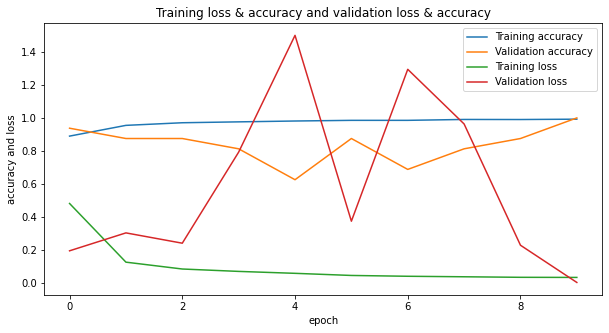

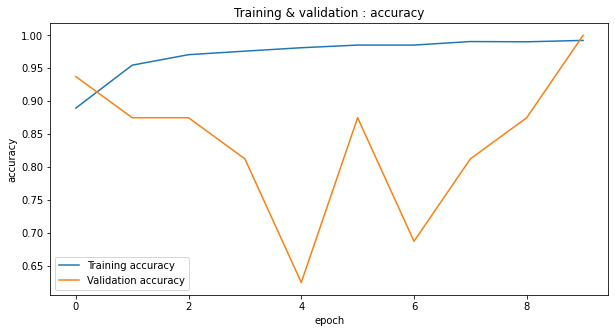

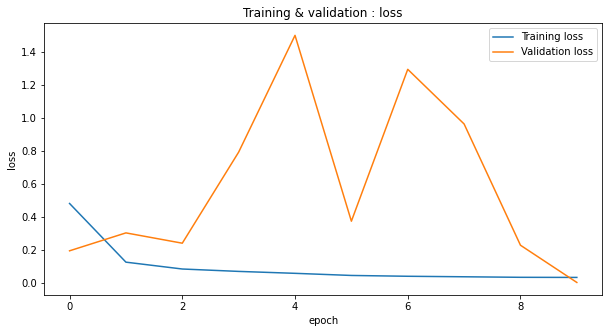

In [ ]:
# calling user defined function for visualization
graph(hist)
graphacc(hist)
graphloss(hist)

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(test_dataset_TLM)
print("Accuracy of the model is - " , test_acc*100 , "%")

20/20 [==============================] - 6s 302ms/step - loss: 1.0413 - accuracy: 0.8510
Accuracy of the model is -  85.09615659713745 %


# **Resnet 50**

<img src="https://i.stack.imgur.com/gI4zT.png" alt="drawing" width="999999"/>

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

#TLM: Transfer learning Models
train_dataset_TLM = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')
val_dataset_TLM = val.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')
test_dataset_TLM = test.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
resnet50 = keras.applications.ResNet50()
resnet50.trainable=False

In [ ]:
model= keras.Sequential([
                         resnet50,
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dense(units=256,activation="relu"),
                         keras.layers.Dense(units=1,activation="sigmoid")
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'] )
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
flatten_17 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               256256    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 257       
Total params: 25,959,017
Trainable params: 322,305
Non-trainable params: 25,636,712
_________________________________________________________________


In [ ]:
#epoch 10
hist=model.fit_generator(generator=train_dataset_TLM,validation_data= val_dataset_TLM,epochs=10)
model.save('resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1739/1739 [==============================] - 69s 38ms/step - loss: 0.6058 - accuracy: 0.7418 - val_loss: 0.8397 - val_accuracy: 0.5000
Epoch 2/10
1739/1739 [==============================] - 65s 38ms/step - loss: 0.5811 - accuracy: 0.7380 - val_loss: 0.7871 - val_accuracy: 0.5000
Epoch 3/10
1739/1739 [==============================] - 66s 38ms/step - loss: 0.5822 - accuracy: 0.7353 - val_loss: 0.9240 - val_accuracy: 0.5000
Epoch 4/10
1739/1739 [==============================] - 66s 38ms/step - loss: 0.5761 - accuracy: 0.7424 - val_loss: 0.8142 - val_accuracy: 0.5000
Epoch 5/10
1739/1739 [==============================] - 65s 37ms/step - loss: 0.5660 - accuracy: 0.7501 - val_loss: 0.9236 - val_accuracy: 0.5000
Epoch 6/10
1739/1739 [==============================] - 65s 37ms/step - loss: 0.5805 - accuracy: 0.7368 - val_loss: 0.7565 - val_accuracy: 0.5000
Epoch 7/10
1739/1739 [==============================] - 65s 37ms/step - loss: 0.5720 - accuracy: 0.7435 - val_loss: 0.8602 -

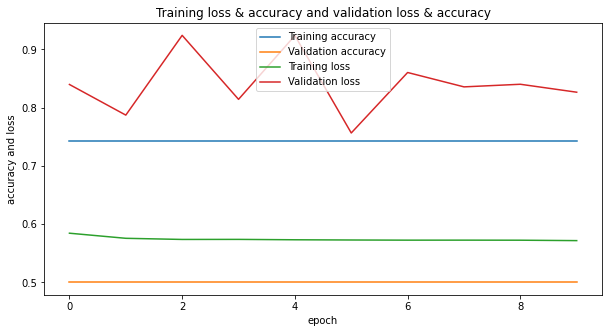

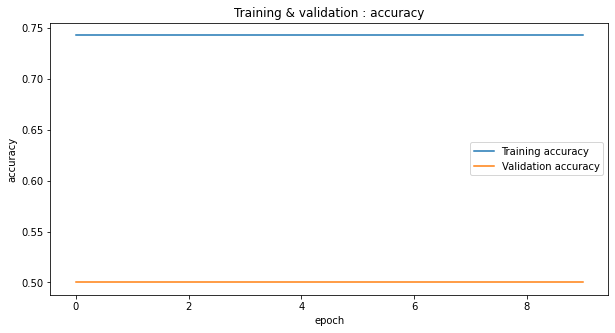

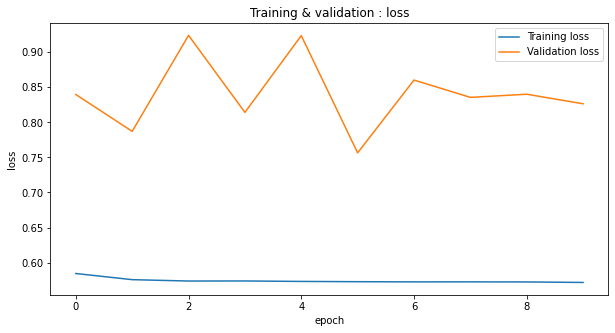

In [ ]:
# calling user defined function for visualization
graph(hist)
graphacc(hist)
graphloss(hist)

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(test_dataset_TLM)
print("Accuracy of the model is - " , test_acc*100 , "%")

208/208 [==============================] - 7s 34ms/step - loss: 0.6945 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


# **Resnet101**

![](https://miro.medium.com/max/2800/0*pkrso8DZa0m6IAcJ.png)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

#TLM: Transfer learning Models
train_dataset_TLM = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')
val_dataset_TLM = val.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')
test_dataset_TLM = test.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
resnet101 = keras.applications.ResNet101()
resnet101.trainable=False

179650560/179648224 [==============================] - 4s 0us/step


In [ ]:
model= keras.Sequential([
                         resnet101,
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dense(units=256,activation="relu"),
                         keras.layers.Dense(units=1,activation="sigmoid")
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.1),
              metrics=['accuracy'] )
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 1000)              44707176  
_________________________________________________________________
flatten_18 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               256256    
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 257       
Total params: 45,029,481
Trainable params: 322,305
Non-trainable params: 44,707,176
_________________________________________________________________


In [ ]:
#epoch 10
from datetime import datetime
start=datetime.now()

hist=model.fit_generator(generator=train_dataset_TLM,validation_data= val_dataset_TLM,epochs=10)
model.save('restnet101.h5')

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1739/1739 [==============================] - 79s 43ms/step - loss: 1.5988 - accuracy: 0.7482 - val_loss: 0.8676 - val_accuracy: 0.5000
Epoch 2/10
1739/1739 [==============================] - 72s 42ms/step - loss: 0.5648 - accuracy: 0.7527 - val_loss: 0.9718 - val_accuracy: 0.5000
Epoch 3/10
1739/1739 [==============================] - 72s 42ms/step - loss: 0.5656 - accuracy: 0.7535 - val_loss: 0.8208 - val_accuracy: 0.5000
Epoch 4/10
1739/1739 [==============================] - 72s 42ms/step - loss: 0.5692 - accuracy: 0.7501 - val_loss: 0.8520 - val_accuracy: 0.5000
Epoch 5/10
1739/1739 [==============================] - 72s 41ms/step - loss: 0.5746 - accuracy: 0.7460 - val_loss: 0.7906 - val_accuracy: 0.5000
Epoch 6/10
1739/1739 [==============================] - 72s 41ms/step - loss: 0.5687 - accuracy: 0.7513 - val_loss: 0.7341 - val_accuracy: 0.5000
Epoch 7/10
1739/1739 [==============================] - 72s 41ms/step - loss: 0.5731 - accuracy: 0.7483 - val_loss: 0.8235 - val_accura

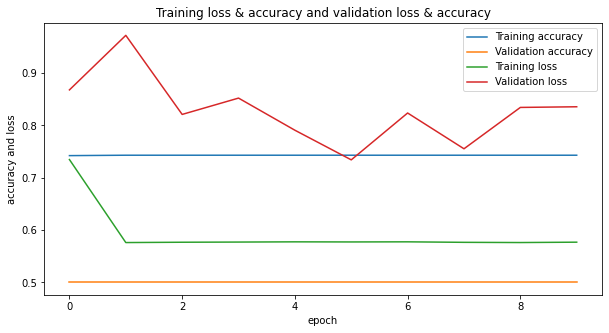

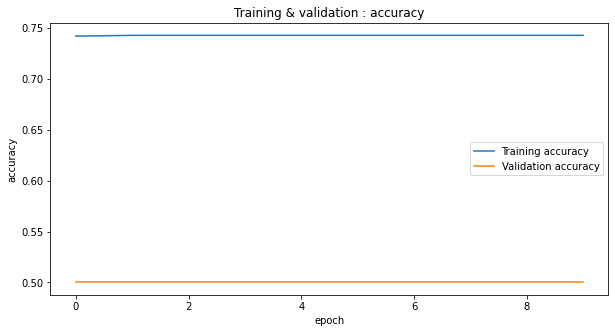

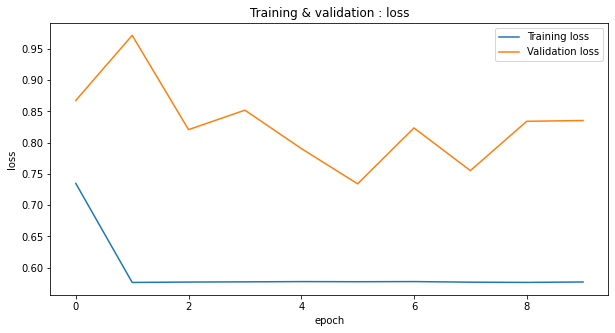

In [ ]:
# calling user defined function for visualization
graph(hist)
graphacc(hist)
graphloss(hist)

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(test_dataset_TLM)
print("Accuracy of the model is - " , test_acc*100 , "%")

208/208 [==============================] - 8s 39ms/step - loss: 0.6989 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


# **Resnet152**

<img src="https://www.researchgate.net/profile/Tin-Kramberger/publication/343615852/figure/fig1/AS:923861193330692@1597277081980/ResNet-152-neural-network-architecture-Slika-1-Arhitektura-ResNet-152-neuronske-mreze.ppm" alt="drawing" width = 200/>

In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

#TLM: Transfer learning Models
train_dataset_TLM = train.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/train',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')
val_dataset_TLM = val.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/val',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')
test_dataset_TLM = test.flow_from_directory('/content/drive/MyDrive/Kaggle/chest_xray/chest_xray/test',
                                          target_size=(224,224),
                                          batch_size=3,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
resnet152 = keras.applications.ResNet152()
resnet152.trainable=False

242900992/242900224 [==============================] - 4s 0us/step


In [ ]:
model= keras.Sequential([
                         resnet152,
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dense(units=256,activation="relu"),
                         keras.layers.Dense(units=1,activation="sigmoid")
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.1),
              metrics=['accuracy'] )
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 1000)              60419944  
_________________________________________________________________
flatten_19 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               256256    
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
Total params: 60,742,249
Trainable params: 322,305
Non-trainable params: 60,419,944
_________________________________________________________________


In [ ]:
#epoch 10
from datetime import datetime
start=datetime.now()

hist=model.fit_generator(generator=train_dataset_TLM,validation_data= val_dataset_TLM,epochs=10)
model.save('restnet152.h5')

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1739/1739 [==============================] - 92s 49ms/step - loss: 1.4640 - accuracy: 0.7274 - val_loss: 0.8755 - val_accuracy: 0.5000
Epoch 2/10
1739/1739 [==============================] - 81s 47ms/step - loss: 0.5727 - accuracy: 0.7457 - val_loss: 0.8492 - val_accuracy: 0.5000
Epoch 3/10
1739/1739 [==============================] - 82s 47ms/step - loss: 0.5769 - accuracy: 0.7423 - val_loss: 0.9228 - val_accuracy: 0.5000
Epoch 4/10
1739/1739 [==============================] - 82s 47ms/step - loss: 0.5813 - accuracy: 0.7342 - val_loss: 0.7457 - val_accuracy: 0.5000
Epoch 5/10
1739/1739 [==============================] - 83s 48ms/step - loss: 0.5739 - accuracy: 0.7435 - val_loss: 0.8841 - val_accuracy: 0.5000
Epoch 6/10
1739/1739 [==============================] - 83s 48ms/step - loss: 0.5799 - accuracy: 0.7382 - val_loss: 0.8391 - val_accuracy: 0.5000
Epoch 7/10
1739/1739 [==============================] - 83s 48ms/step - loss: 0.5764 - accuracy: 0.7408 - val_loss: 0.7832 - val_accura

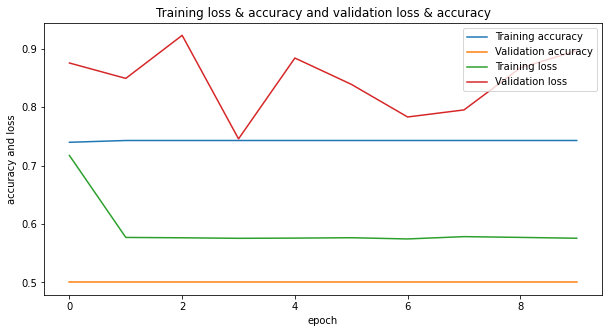

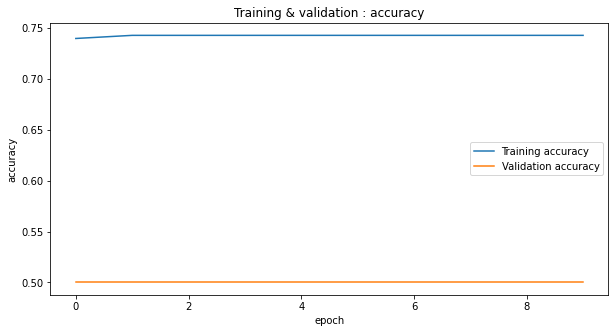

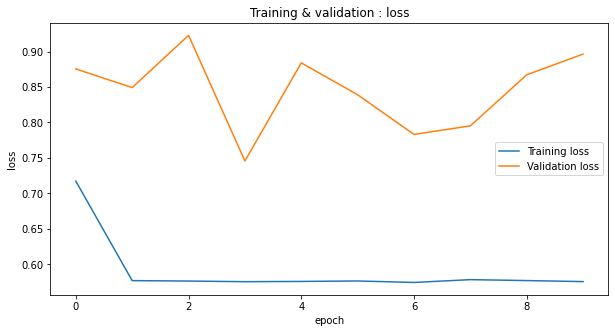

In [ ]:
# calling user defined function for visualization
graph(hist)
graphacc(hist)
graphloss(hist)

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(test_dataset_TLM)
print("Accuracy of the model is - " , test_acc*100 , "%")

208/208 [==============================] - 10s 46ms/step - loss: 0.7316 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


**After applying Transfer learning models to `X-ray images of Lungs` these are the results given below  :**

---


1. VGG16 (Method1)
- Train Accuracy        : 73%
- Validation Accuracy   : 50%
- Test Accuracy         : 62%  
    
   VGG16(Method2)
- Train Accuracy        : 100%
- Validation Accuracy   : 87%
- Test Accuracy         : 75%

---

2. VGG19
- Train Accuracy        : 99%
- Validation Accuracy   : 100%
- Test Accuracy         : 85%

---
3. Resnet50 
- Train Accuracy        : 73%
- Validation Accuracy   : 50%
- Test Accuracy         : 62%
---
4. Resnet101
- Train Accuracy        : 74%
- Validation Accuracy   : 50%
- Test Accuracy         : 62%

---
5. Resnet152
- Train Accuracy        : 74%
- Validation Accuracy   : 50%
- Test Accuracy         : 62%

---
---

From the above experiment I've observed that:

**Model &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:** VGG19 Transfer Learning Model  

**Activation funtion &nbsp;&nbsp;:** Relu(Hidden Layer) & Sigmoid(Output Layer)    

**Optimizer &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:** RMSprop,  

**Learning Rate &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:** 0.01    

**Epochs &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:** 10 

**Callbacks &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:** ReduceLROPlateau

Building a Model with the combination of above parameters for **`X-ray images of Lungs`** DataSet 
Model giving **`99%`** Accuracy in Training and **`85%`** Accuracy in Testing


---

# Predicting with VGG19 Model

In [ ]:
model.predict_classes(val_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
val_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


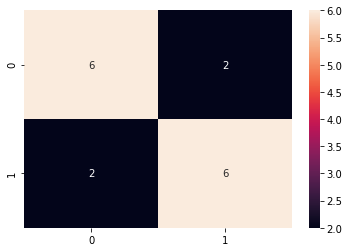

In [ ]:
sns.heatmap(confusion_matrix(model.predict_classes(val_dataset),val_dataset.classes),annot=True)

- From 16 X-ray Samples VGG19 Model predicting 12 correct Samples 